In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Classified Data' , index_col = 0)   #index_col is used to remove unanamed column (make 0th columns as index column

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
import seaborn as sns

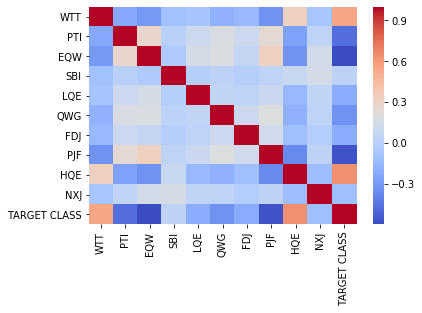

In [11]:
sns.heatmap(df.corr() , cmap='coolwarm')

In [5]:
df.drop(["NXJ" , "SBI"] , inplace=True ,axis = 1)

In [6]:
df.head()

,WTT,PTI,EQW,LQE,QWG,FDJ,PJF,HQE,TARGET CLASS
0,0.913917,1.162073,0.567946,0.780862,0.352608,0.759697,0.643798,0.879422,1
1,0.635632,1.003722,0.535342,0.924109,0.648450,0.675334,1.013546,0.621552,0
2,0.721360,1.201493,0.921990,1.526629,0.720781,1.626351,1.154483,0.957877,0
3,1.234204,1.386726,0.653046,1.142504,0.875128,1.409708,1.380003,1.522692,1
4,1.279491,0.949750,0.627280,1.232537,0.703727,1.115596,0.646691,1.463812,1


In [7]:
x = df.drop('TARGET CLASS' , axis = 1)

In [8]:
y = df['TARGET CLASS']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3)

In [11]:
x_train.shape

(700, 8)

In [22]:
x_test.shape

(300, 8)

In [23]:
y_train.shape

(700,)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors= 4)

In [14]:
knn.fit(x_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [15]:
y_pred  = knn.predict(x_test)

In [58]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [16]:
import numpy as np

In [17]:
np.mean(y_pred!=y_test)

0.08666666666666667

In [18]:
err_rate = []
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train , y_train)
    y_pred  = knn.predict(x_test)
    err_rate.append(np.mean(y_pred!=y_test))
    

In [19]:
err_rate

[0.09333333333333334,
 0.10666666666666667,
 0.08,
 0.08666666666666667,
 0.07666666666666666,
 0.09,
 0.08,
 0.08,
 0.06666666666666667,
 0.07666666666666666,
 0.07666666666666666,
 0.07333333333333333,
 0.08,
 0.07,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.07666666666666666,
 0.07666666666666666,
 0.07333333333333333,
 0.07333333333333333,
 0.07666666666666666,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.08,
 0.07666666666666666,
 0.08,
 0.08333333333333333,
 0.07666666666666666,
 0.08,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.07666666666666666,
 0.08,
 0.07666666666666666,
 0.07,
 0.07333333333333333,
 0.07]

In [20]:
min(err_rate)

0.06666666666666667

In [21]:
import matplotlib.pyplot as plt

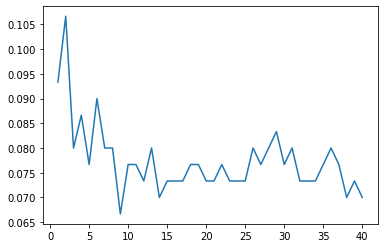

In [22]:
plt.plot(range(1,41) , err_rate)

In [23]:
knn = KNeighborsClassifier(n_neighbors= i)
knn.fit(x_train , y_train)
y_pred  = knn.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(y_test , y_pred)

In [26]:
cm

array([[138,  11],
       [ 10, 141]])